In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
  

# <font color='Blue'>Prevendo a Quantidade de Passageiros</font>

![](https://c.tenor.com/dw-Z43yW9gwAAAAC/plane-avion.gif)


In [2]:
airline = pd.read_csv('AirPassengers.csv',index_col ='Month',parse_dates = True)

In [3]:
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


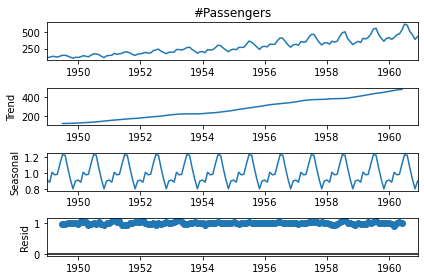

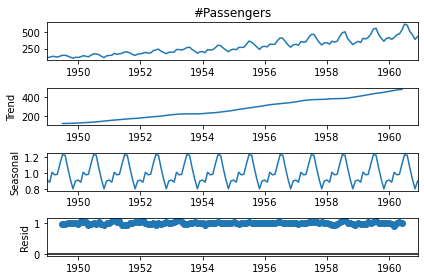

In [7]:
# ETS Decomposition
result = seasonal_decompose(airline['#Passengers'], 
                            model ='multiplicative')
  
# ETS plot 
result.plot()

Modelo ARIMA para Previsão de Séries Temporais
ARIMA significa modelo de média móvel integrado autoregressivo e é especificado por três parâmetros de ordem: (p, d, q).
AR ( p ) Autorregressão - um modelo de regressão que utiliza a relação dependente entre uma observação atual e as observações de um período anterior. Um componente auto regressivo ( AR (p) ) refere-se ao uso de valores passados ​​na equação de regressão para a série temporal .
I ( d ) Integração - usa diferenciação de observações (subtraindo uma observação da observação no intervalo de tempo anterior) para tornar a série temporal estacionária. A diferença envolve a subtração dos valores atuais de uma série com seus valores anteriores d número de vezes.
MA ( q ) Média móvel - um modelo que usa a dependência entre uma observação e um erro residual de um modelo de média móvel aplicado a observações defasadas. Um componente de média móvel representa o erro do modelo como uma combinação de termos de erro anteriores. A ordem q representa o número de termos a serem incluídos no modelo.

Tipos de modelo ARIMA
ARIMA: médias móveis integradas autoregressivas não sazonais
SARIMA: Sazonal ARIMA
SARIMAX: ARIMA sazonal com variáveis ​​exógenas

Pirâmide Auto-ARIMA

O 'auto_arima' função do 'pmdarima' biblioteca nos ajuda a identificar a maioria dos parâmetros ideais para um modelo ARIMA e retorna um modelo ARIMA equipada



## Código: Análise de Parâmetros para o modelo ARIMA

In [8]:
# To install the library
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Import the library
from pmdarima import auto_arima

In [10]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  

In [11]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.60 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.59 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.80 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.46 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 26 Sep 2022   AIC                           1019.178
Time:                                     17:56:42   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Código: Ajustar o modelo ARIMA ao conjunto de dados AirPassengers

In [14]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['#Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38764D+00    |proj g|=  6.97725D-02

At iterate    5    f=  3.38035D+00    |proj g|=  2.63277D-02

At iterate   10    f=  3.36375D+00    |proj g|=  9.80501D-03

At iterate   15    f=  3.35813D+00    |proj g|=  4.63288D-03

At iterate   20    f=  3.35667D+00    |proj g|=  3.18395D-03

At iterate   25    f=  3.35626D+00    |proj g|=  8.25374D-04

At iterate   30    f=  3.35617D+00    |proj g|=  6.62256D-05

At iterate   35    f=  3.35617D+00    |proj g|=  1.26511D-04

At iterate   40    f=  3.35617D+00    |proj g|=  1.07164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.014
Date:                            Mon, 26 Sep 2022   AIC                            896.029
Time:                                    14:05:42   BIC                            909.924
Sample:                                01-01-1949   HQIC                           901.671
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.075     -3.976      0.000      -0.446      -0.151
ar.S.L12       0.7095      0.220      3.222      0.001       0.278       1.141
ar.S.L24       0.2895      0.099      2.912      0.004       0.095       0.484
ma.S.L12      -0.9788      1.957     -0.500      0.617      -4.814       2.856
sigma2        88.3700    155.429      0.569      0.570    -216.265     393.006
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Código: previsões do modelo ARIMA em relação ao conjunto de teste

<AxesSubplot:xlabel='Month'>

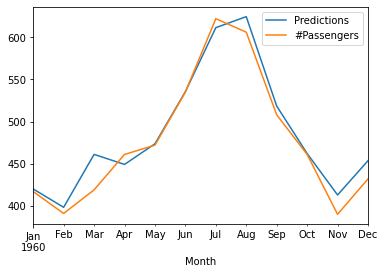

In [15]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

## Código: Avalie o modelo usando MSE e RMSE

In [21]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  

In [22]:
# Calculate root mean squared error
rmse(test["#Passengers"], predictions)
  

17.14532810076303

In [23]:
# Calculate mean squared error
mean_squared_error(test["#Passengers"], predictions)

293.9622756828145

## Código: Previsão usando modelo ARIMA

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51881D+00    |proj g|=  8.79689D-02


 This problem is unconstrained.



At iterate    5    f=  3.50915D+00    |proj g|=  1.43786D-02

At iterate   10    f=  3.49212D+00    |proj g|=  1.26965D-02

At iterate   15    f=  3.48681D+00    |proj g|=  2.55439D-03

At iterate   20    f=  3.48602D+00    |proj g|=  2.55179D-03

At iterate   25    f=  3.48586D+00    |proj g|=  1.21603D-03

At iterate   30    f=  3.48583D+00    |proj g|=  3.41781D-04

At iterate   35    f=  3.48582D+00    |proj g|=  2.02082D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     51      1     0     0   2.195D-04   3.486D+00
  F =   3.4858212327137426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

<AxesSubplot:xlabel='Month'>

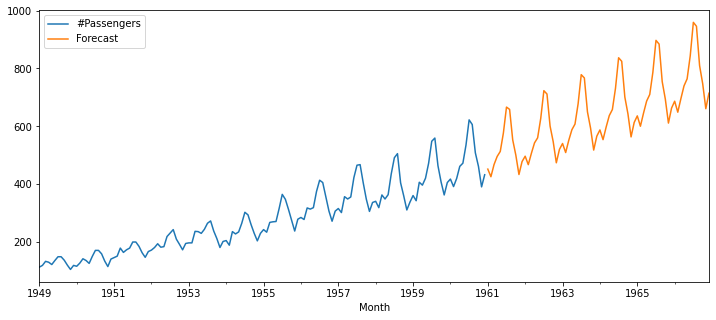

In [25]:
# Train the model on the full dataset
model = model = SARIMAX(airline['#Passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 6 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)